---
title: 'Лабораторна робота 2. OpenCV. Геометричні перетворення зображення'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: "&copy; [<span style='color: blue;'>Tereshchenko Daniil </span>](https://github.com/whytereshchenko/Tereshchenko_OpenCV), 2023"
date: "12.14.2023"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _знайомство з методами геометричних перетворень бібліотеки OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

::: callout-note
## Примітка
Попередньо потрібно опрацювати лекцію 8.
:::

#### Що ви будете вміти?
* Виконувати афінні та перспективні перетворення та ін.

## Геометричні перетворення зображення Засобами openCV

### Трансформації зображення.  [Афінні перетворення](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)

У процесі препроцессінгу зображення або їх колекцій може виникати потреба виконувати
геометричні трансформації зображення. Більшу частину таких трансформацій складають _афінні перетворення_.
В афінних перетвореннях особливу роль відіграють декілька частинних випадків:
        * масштабування (scaling)
        * трансляція (translation)
        * поворот (rotation)
        * дзеркальне відображення відносной однієї чи двох осей (reflection)
Виникає потреба виконувати й інші елементарні трансформації, наприклад, _вилучення фрагмента_ зображення або _перспективні перетворення_.
Розглянемо детально основні з них.  

In [2]:
# Імпортуємо пакети
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# print(f'version cv2: {cv.__version__}')
print('version cv2: %s' % cv.__version__)

version cv2: 4.6.0


image shape/dimensions: (1306, 960, 3)
image number of pixels: 3761280
grey image shape/scale: (1306, 960)
grey image number of pixels: 1253760


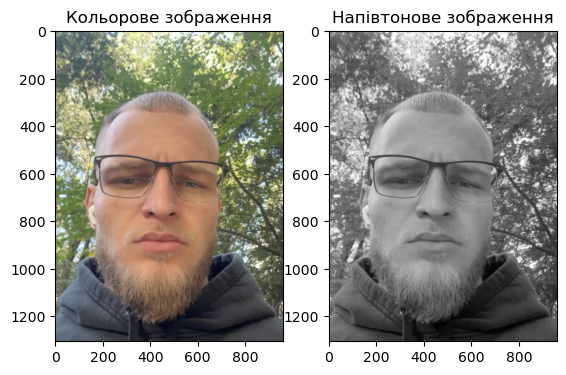

In [7]:
import cv2
import matplotlib.pyplot as plt

# Завантажуємо RGB-зображення
image = cv2.imread('image/me.png')
print(f'image shape/dimensions: {image.shape}')
print(f'image number of pixels: {image.size}')

# Розділяємо зображення на канали
red, green, blue = cv2.split(image)
# Формуємо напівтонове зображення
image_grey = cv2.imread('image/me.png', cv2.IMREAD_GRAYSCALE)

print(f'grey image shape/scale: {image_grey.shape}')
print(f'grey image number of pixels: {image_grey.size}')

# Візуалізуємо зображення засобами Matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Кольорове зображення')

plt.subplot(132)
plt.imshow(image_grey, cmap='gray')
plt.title('Напівтонове зображення')

plt.show()

### [Вилучення фрагмента зображення](https://arboook.com/kompyuternoe-zrenie/osnovnye-operatsii-s-izobrazheniyami-v-opencv-3-python/)

Для вилучення фрагмента зображення достатньо вказати діапазони пікселів у матриці зображення.

image shape/dimentions: (1306, 960, 3)
image number of pixel: 3761280


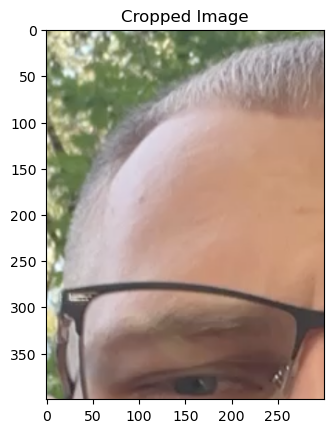

In [9]:
# вирізаємо діапазон пікселів
# image_cropped = image[250:650, 150:450]

# # візуалізуємо результат
# cv.imshow('cropped image', image_cropped)
# cv.waitKey(0)
# cv.destroyAllWindows()

import cv2
import matplotlib.pyplot as plt

# Завантажуємо RGB-зображення
image = cv2.imread('image/me.png')
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

# Вирізаємо діапазон пікселів
image_cropped = image[250:650, 150:450]

# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()


### Трансляція

Трансляція є зсув положення об'єкта. Якщо позначити параметри зсуву як $t_x, t_y$, то зсув можна задати матрицею:
$$M = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
\end{bmatrix}.$$

image shape/dimentions: (1306, 960, 3)
image number of pixel: 3761280


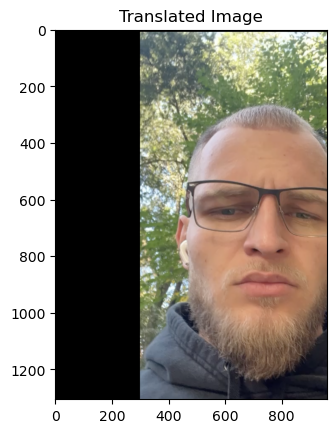

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантажуємо RGB-зображення
image = cv2.imread('image/me.png')
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

# Вилучаємо розміри зображення
rows, cols = image.shape[:2]

# Задаємо матрицю трансляції
M_translation = np.float32([
    [1, 0, 300],
    [0, 1, 10]
])
image_trans = cv2.warpAffine(image, M_translation, (cols, rows))

# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_trans, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.show()

### Масштабування

image shape/dimentions: (1306, 960, 3)
image number of pixel: 3761280


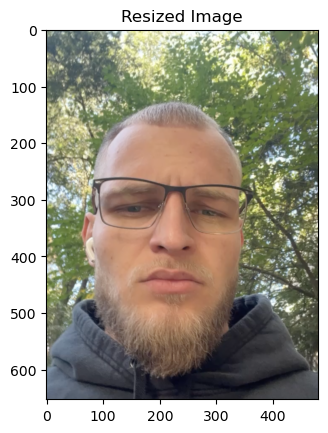

In [13]:
import cv2
import math
import matplotlib.pyplot as plt

# Завантажуємо RGB-зображення
image = cv2.imread('image/me.png')
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

# Визначаємо новий розмір
rows, cols = image.shape[:2]
rows_resized = (math.floor(cols * 0.5), math.floor(rows * 0.5))

# Змінюємо розмір зображення
image_resize = cv2.resize(image, rows_resized, interpolation=cv2.INTER_AREA)

# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()

### Поворот 

Поворот зображення на кут $\theta$ задається матрицею обертання
$$\begin{bmatrix}
cos \theta & -sin \theta \\
sin \theta & cos \theta
\end{bmatrix},$$
але в OpenCV реалізовано _масштабований поворот_ з регульованим центром обертання, що дає можливість самостійно задвати центр обертання. Це забезпечується модифікованою матрицею обертання
$$\begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot center.x - \beta \cdot center.y\\
-\beta & \alpha & \beta \cdot center.x + (1 - \alpha) \cdot center.y 
\end{bmatrix},$$ 
де
$$\begin{matrix}
\alpha = scale \cdot cos \theta \\
\beta = scale \cdot sin \theta
\end{matrix}.$$


image shape/dimensions: (1306, 960, 3)
image number of pixel: 3761280


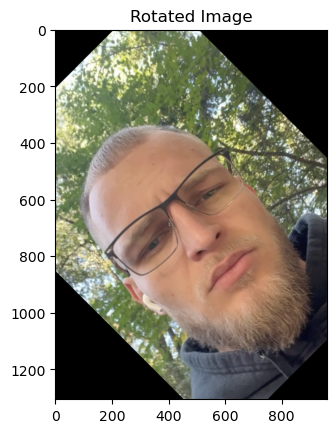

In [3]:
# # Повернемо отримане вище обрізане зображення на 90 градусів
# rows, cols = image_cropped.shape[:2]
# center_y = rows / 2
# center_x = cols / 2
# scale = 1
# theta = 90
# M_rotaton = cv.getRotationMatrix2D((center_x, center_y), theta, scale)
# image_rotate = cv.warpAffine(image_cropped, M_rotaton, (cols, rows))
# cv.imshow('image rotation', image_rotate)
# cv.waitKey(0)
# cv.destroyAllWindows()

import cv2
import math
import matplotlib.pyplot as plt

# Завантажуємо RGB-зображення
image = cv2.imread('image/me.png')
print(f'image shape/dimensions: {image.shape}')
print(f'image number of pixel: {image.size}')

# Обчислюємо центр зображення
rows, cols = image.shape[:2]
center = (cols / 2, rows / 2)

# Задаємо кут обертання (у градусах)
angle = 45  # Наприклад, обертання на 45 градусів

# Обертаємо зображення
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
image_rotated = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.show()

## [Загальний випадок афінних перетворень](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)

У загальному випадку афінних перетворень всі паралельні лінії вихідного зображення будуть паралельними у вихідному зображенні. Щоб знайти матрицю перетворення, нам потрібні три точки від вхідного зображення та їх відповідні місця у вихідному зображенні. ![Афінні перетворення за трьома точками](image/affine_demo.jpg)

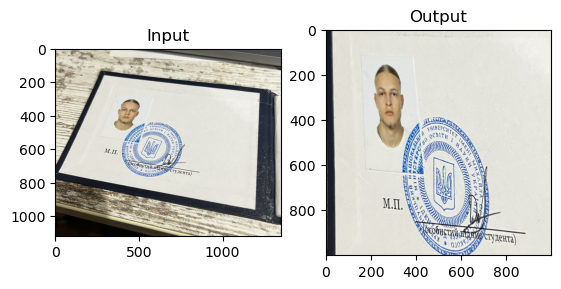

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('image/zalik.png')

output_width = 1000
output_height = 1000

points_input = np.float32(
    [      
        [250, 200],      
        [1200, 300],
        [0, 700], 
    ]
)
points_output = np.float32(
    [
        [0, 0],                  
        [output_width, 0],       
        [0, output_height]       
    ]
)

affine_transform = cv.getAffineTransform(points_input, points_output)
image_affine_trans = cv.warpAffine(image, affine_transform, (output_width, output_height))
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Input') 
image_affine_trans_rgb = cv.cvtColor(image_affine_trans, cv.COLOR_BGR2RGB)
plt.subplot(122)
plt.imshow(image_affine_trans_rgb)
plt.title('Output')
cv.imwrite('image/zalik_output.png', image_affine_trans)
plt.show()

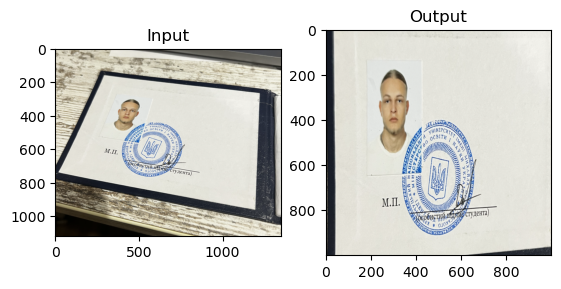

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('image/zalik.png')

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Input')

points_input = np.float32(
    [      
        [250, 200],      
        [1200, 300],
        [1200, 1000],
        [0, 700] 

    ]
)
output_width = 1000
output_height = 1000

points_output = np.float32(
    [
        [0, 0],                  
        [output_width, 0],       
        [output_width, output_height],  
        [0, output_height]        
    ]
)
M_perspective_trans = cv.getPerspectiveTransform(points_input, points_output)
image_perspective_trans = cv.warpPerspective(image, M_perspective_trans, (output_width, output_height))
image_perspective_trans_rgb = cv.cvtColor(image_perspective_trans, cv.COLOR_BGR2RGB)

plt.subplot(122)
plt.imshow(image_perspective_trans_rgb)
plt.title('Output')
cv.imwrite('images/output_zalik_perspective.jpg', image_perspective_trans)
plt.show()

### Перспективні перетворення

Перспективне перетворення, реалізоване в OpenCV дає можливість виконати корегування об'єкта на зображенні, коли мало місце його перспективне викривлення (див. рис. нижче). ![](image/perspective_exampl.jpg)  
Для цього необхідно задати координати чотирьох точок фрагмента, що нас цікавить, на вхідному зображенні, і координати, що мають відповідати положенню даного фрагмента на вихідному.

::: callout-note
## Примітка
_Це питання пропонується розглянути самостійно. Детальне керівництво і приклади можна знайти_ [тут](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html), [тут](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html) і [тут](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void%20warpPerspective(InputArray%20src,%20OutputArray%20dst,%20InputArray%20M,%20Size%20dsize,%20int%20flags,%20int%20borderMode,%20const%20Scalar&%20borderValue)). .
:::

## Завдання для самостіної роботи

1. Завантажити `Anaconda` та активувати віртуальне середовище з ім'ям `<StudentLastName>_OpenCV`, створене у лабораторній роботі №1.
1. Створити Notebook-документ `<lab_2_StudentLastName>` за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)).
1. Імпортувати  RGB-зображення `Image` з диску. Оцінити його розмір у пікселях $N \times M$ та об'єм пам'яті, який він займає на диску.
1. Імпортувати RGB-зображення `Image` у напівтоновому форматі. Оцінити його розмір у пікселях та об'єм пам'яті, який він займає на диску. Порівняти результати з попередніми результатами. Пояснити результати.    
1. Зменшити початкове RGB-зображення `Image` у $n$ разів, візуалізувати його, перевіривши результат масштабування, та експортувати його на диск. Чи змінився об'єм пам'яті, який він займає на диску? Обгрунтувати отриманий результат.
1. Написати функцію, яка буде виконувати пропорційне зменшення початкового зображення розміром $N \times M$ пікселей відповідно до вимоги, щоби зменешене зображення мало ширину $K$ пікселей.
1. Зробити фото __розвороту власної залікової книжки__ з перспективним викривленням на фоні письмового столу. Вирізати зону із заліковкою та виконати афінні та перспективні перетворення за трьома точками точками і візуалізовані. В кожному випадку результати мають бути записані на диск.
1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Дати відповіді на контрольні запитання.

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_2_StudentLastName.ipynb --to html`

11. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_2_StudentLastName.ipynb` та `lab_2_StudentLastName.html` 

## Контрольні запитання

1. У чому полягає сенс афінних перетворень? - Афінні перетворення використовуються для маніпулювання об'єктами у 2D просторі, змінюючи їх розмір та положення, але при цьому зберігаючи відносні відстані та паралельність ліній. Вони є ключовими у графічному дизайні, обробці зображень та комп'ютерному зорі для зміни розмірів, повороту та переміщення об'єктів.

1. Чи є оперції трансляції, масштабування і повороту афінними? Відповідь обгрунтувати. - Трансляція, масштабування, і поворот є афінними перетвореннями. Вони дозволяють змінювати положення, розмір та орієнтацію об'єктів у просторі, зберігаючи їхні основні геометричні властивості, як-от форму і відносні пропорції.

1. Чи є перспективні перетворення частинним випадком афінних перетворень? Відповідь обгрунтувати. - Перспективні перетворення не є частиною афінних перетворень. Вони використовуються для імітації перспективи, змінюючи властивості об'єктів таким чином, що паралельні лінії можуть здаватися сходящимися. Це контрастує з афінними перетвореннями, які зберігають паралельність і пропорції навіть після змін.

## References

1. [Anaconda (Python distribution).](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
1. [Conda.](https://conda.io/en/latest/)
1. [Geometric Transformations of Images.](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html)